In [1]:
# Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os


In [2]:
# Kaggle authentication + download of interest rate data + processing into dataframe

import kaggle
kaggle.api.authenticate()

kaggle.api.dataset_download_files('federalreserve/interest-rates', unzip=True)
os.rename('./index.csv','./rates-data.csv')

rates_df = pd.read_csv('./rates-data.csv')

rates_df.head(10)


,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN
5,1954,12,1,NaN,NaN,NaN,1.28,NaN,5.0,NaN
6,1955,1,1,NaN,NaN,NaN,1.39,11.9,4.9,NaN
7,1955,2,1,NaN,NaN,NaN,1.29,NaN,4.7,NaN
8,1955,3,1,NaN,NaN,NaN,1.35,NaN,4.6,NaN
9,1955,4,1,NaN,NaN,NaN,1.43,6.7,4.7,NaN


In [3]:
# NASDAQ API URL setup + download of S&P 500 PE data + processing into dataframe

import nasdaqdatalink
from api_keys import nasdaq_api_key

dataset_code = 'MULTPL/SP500_PE_RATIO_MONTH'

nasdaq_url = f'https://data.nasdaq.com/api/v3/datasets/{dataset_code}.json?api_key={nasdaq_api_key}'

response = requests.get(nasdaq_url).json()


pe_df = pd.DataFrame(response['dataset']['data'])

pe_df.rename(columns={0:'Date',1:'S&P 500 PE Ratio'},inplace=True)

pe_df.head(10)


,Date,S&P 500 PE Ratio
0,2023-07-01,25.78
1,2023-06-30,25.76
2,2023-06-01,25.15
3,2023-05-31,24.20
4,2023-05-01,24.00
5,2023-04-01,23.86
6,2023-03-31,21.97
7,2023-03-01,22.97
8,2023-02-28,21.22
9,2023-02-01,23.62


Year                            904
Month                           904
Day                             904
Federal Funds Target Rate       462
Federal Funds Upper Target      103
Federal Funds Lower Target      103
Effective Federal Funds Rate    752
Real GDP (Percent Change)       250
Unemployment Rate               752
Inflation Rate                  710
dtype: int64
              Year       Month         Day  Federal Funds Target Rate  \
count   904.000000  904.000000  904.000000                 462.000000   
mean   1986.680310    6.598451    3.598451                   5.658415   
std      17.172843    3.471963    6.791079                   2.553891   
min    1954.000000    1.000000    1.000000                   1.000000   
25%    1973.000000    4.000000    1.000000                   3.750000   
50%    1987.500000    7.000000    1.000000                   5.500000   
75%    2001.000000   10.000000    1.000000                   7.750000   
max    2017.000000   12.000000   31.000000 

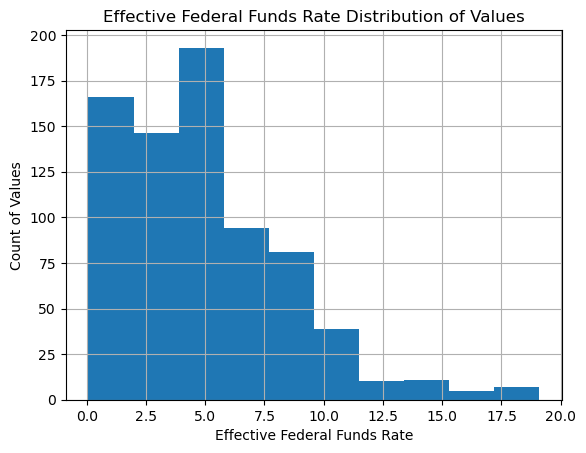

In [4]:
# Dataset details + summary statistics + distribution of values for rate data

print(rates_df.count())
print(rates_df.describe())

effective_rates = rates_df['Effective Federal Funds Rate']

plt.hist(effective_rates)

plt.title('Effective Federal Funds Rate Distribution of Values')
plt.xlabel('Effective Federal Funds Rate')
plt.ylabel('Count of Values')
plt.grid()

plt.show()


Date                1864
S&P 500 PE Ratio    1864
dtype: int64
       S&P 500 PE Ratio
count       1864.000000
mean          16.209179
std            8.571940
min            5.310000
25%           11.595000
50%           15.070000
75%           18.552500
max          123.730000


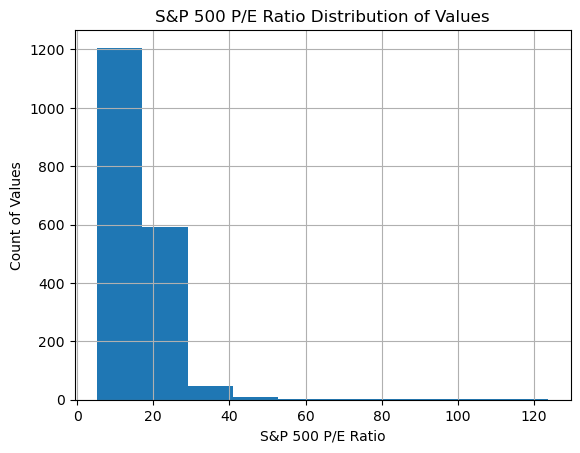

In [5]:
# Dataset details + summary statistics + distribution of values for PE data

print(pe_df.count())
print(pe_df.describe())

plt.hist(pe_df['S&P 500 PE Ratio'])

plt.title('S&P 500 P/E Ratio Distribution of Values')
plt.xlabel('S&P 500 P/E Ratio')
plt.ylabel('Count of Values')
plt.grid()

plt.show()


In [6]:
# Add leading zeroes to single-digit values in Month and Day columns of rates dataframe

month2 = []
day2 = []

for x in rates_df['Month']:

    if x < 10:
        month2.append('0' + str(x))
    else:
        month2.append(x)
    
for x in rates_df['Day']:

    if x < 10:
        day2.append('0' + str(x))
    else:
        day2.append(x)

        
rates_df['Month2'] = month2
rates_df['Day2'] = day2

rates_df.head(10)

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate,Month2,Day2
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN,07,01
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN,08,01
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN,09,01
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN,10,01
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN,11,01
5,1954,12,1,NaN,NaN,NaN,1.28,NaN,5.0,NaN,12,01
6,1955,1,1,NaN,NaN,NaN,1.39,11.9,4.9,NaN,01,01
7,1955,2,1,NaN,NaN,NaN,1.29,NaN,4.7,NaN,02,01
8,1955,3,1,NaN,NaN,NaN,1.35,NaN,4.6,NaN,03,01
9,1955,4,1,NaN,NaN,NaN,1.43,6.7,4.7,NaN,04,01


In [7]:
# Combine new Month2 and Day2 column values in rates dataframe with Year values to match formatting in PE dataframe

rates_df['Date'] = ''
dates = []

for i in range(rates_df['Year'].size):
    
    year = rates_df['Year'].values[i]
    month = rates_df['Month2'].values[i]
    day = rates_df['Day2'].values[i]
    
    date = f'{year}-{month}-{day}'
    
    dates.append(date)
    
rates_df['Date'] = dates

rates_df.head(10)


,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate,Month2,Day2,Date
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN,07,01,1954-07-01
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN,08,01,1954-08-01
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN,09,01,1954-09-01
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN,10,01,1954-10-01
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN,11,01,1954-11-01
5,1954,12,1,NaN,NaN,NaN,1.28,NaN,5.0,NaN,12,01,1954-12-01
6,1955,1,1,NaN,NaN,NaN,1.39,11.9,4.9,NaN,01,01,1955-01-01
7,1955,2,1,NaN,NaN,NaN,1.29,NaN,4.7,NaN,02,01,1955-02-01
8,1955,3,1,NaN,NaN,NaN,1.35,NaN,4.6,NaN,03,01,1955-03-01
9,1955,4,1,NaN,NaN,NaN,1.43,6.7,4.7,NaN,04,01,1955-04-01


In [8]:
# Merge into single dataframe (using 'inner' merge to drop duplicative end-of-month rows from PE dataset (bc only day=01 rows have matches in the rates table) and to drop extra PE values for dates before 1954 and after 2017

combined_df = pe_df.merge(rates_df,how='inner',on='Date')

combined_df.head(10)

print(combined_df.count())

combined_df.head()


Date                            753
S&P 500 PE Ratio                753
Year                            753
Month                           753
Day                             753
Federal Funds Target Rate       315
Federal Funds Upper Target       99
Federal Funds Lower Target       99
Effective Federal Funds Rate    752
Real GDP (Percent Change)       250
Unemployment Rate               752
Inflation Rate                  710
Month2                          753
Day2                            753
dtype: int64


,Date,S&P 500 PE Ratio,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate,Month2,Day2
0,2017-03-01,23.60,2017,3,1,NaN,0.75,0.50,NaN,NaN,NaN,NaN,03,01
1,2017-02-01,23.68,2017,2,1,NaN,0.75,0.50,0.66,NaN,4.7,2.2,02,01
2,2017-01-01,23.59,2017,1,1,NaN,0.75,0.50,0.65,NaN,4.8,2.3,01,01
3,2016-12-01,23.76,2016,12,1,NaN,0.50,0.25,0.54,NaN,4.7,2.2,12,01
4,2016-11-01,23.35,2016,11,1,NaN,0.50,0.25,0.41,NaN,4.6,2.1,11,01


In [9]:
# Reduce to primary columns for analysis, using Effective Federal Funds Rate to represent rates

clean_df = combined_df[['Date','S&P 500 PE Ratio','Effective Federal Funds Rate']].dropna().sort_values('Date',ignore_index=True)

print(clean_df.count())

clean_df.head(50)


Date                            752
S&P 500 PE Ratio                752
Effective Federal Funds Rate    752
dtype: int64


,Date,S&P 500 PE Ratio,Effective Federal Funds Rate
0,1954-07-01,11.49,0.80
1,1954-08-01,11.70,1.22
2,1954-09-01,11.96,1.06
3,1954-10-01,12.02,0.85
4,1954-11-01,12.28,0.83
5,1954-12-01,12.62,1.28
6,1955-01-01,12.56,1.39
7,1955-02-01,12.70,1.29
8,1955-03-01,12.33,1.35
9,1955-04-01,12.39,1.43


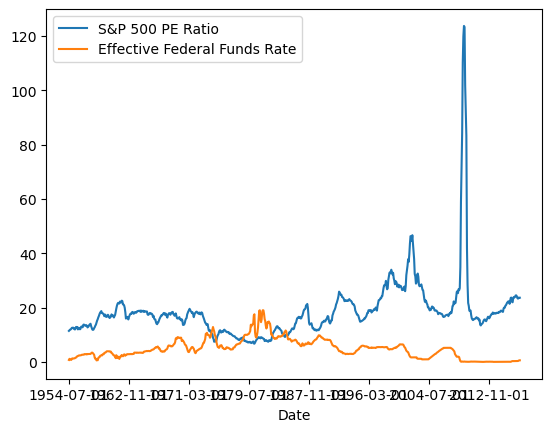

In [10]:
# Plot line chart of both values by date, including outliers

clean_df.plot('Date',['S&P 500 PE Ratio','Effective Federal Funds Rate'])

regression = linregress(clean_df['Effective Federal Funds Rate'],clean_df['S&P 500 PE Ratio'])


-0.4014295537415592


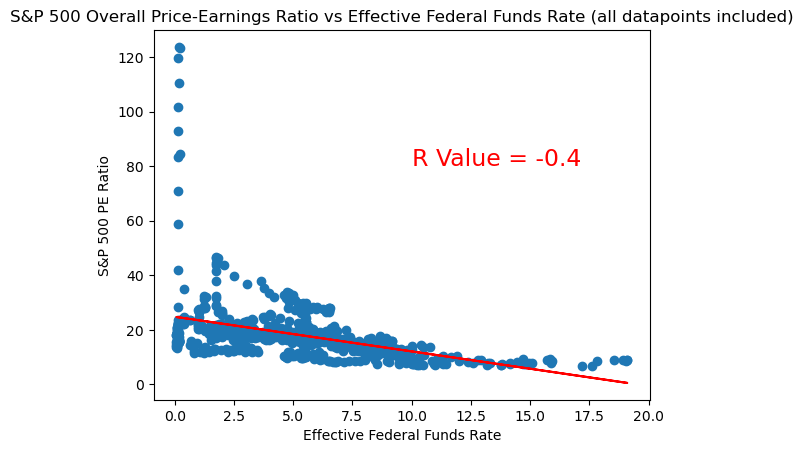

In [11]:
# Regression r value, with outliers included

regression = linregress(clean_df['Effective Federal Funds Rate'],clean_df['S&P 500 PE Ratio'])

print(regression.rvalue)


# Scatter plot and linear regression line together, with outliers included

plt.scatter(clean_df['Effective Federal Funds Rate'],clean_df['S&P 500 PE Ratio'])
plt.title("S&P 500 Overall Price-Earnings Ratio vs Effective Federal Funds Rate (all datapoints included)")
plt.xlabel("Effective Federal Funds Rate")
plt.ylabel("S&P 500 PE Ratio")
plt.plot(clean_df['Effective Federal Funds Rate'],regression.intercept + regression.slope * clean_df['Effective Federal Funds Rate'],'r')
plt.text(10,80,f'R Value = {round(regression.rvalue,2)}',color='r',fontsize=17)
plt.show()

7.02


Text(0.5, 1.0, 'S&P 500 P/E Ratio Boxplot')

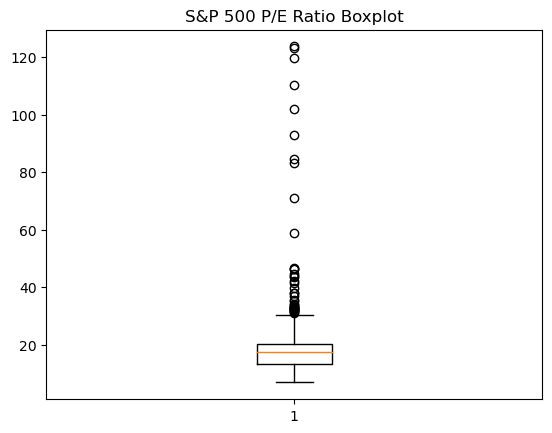

In [12]:
# PE data boxplot

pes = clean_df['S&P 500 PE Ratio']

pe_quartiles = pes.quantile([0.25,0.5,0.75])
pe_iqr = pe_quartiles[0.75] - pe_quartiles[0.25]
print(pe_iqr)

plt.boxplot(pes)
plt.title('S&P 500 P/E Ratio Boxplot')

<Axes: >

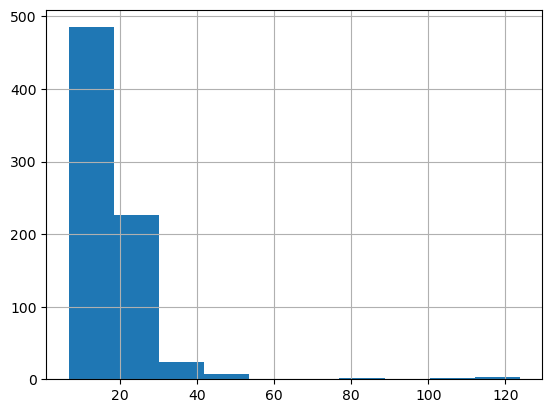

In [13]:
# PE data histogram

pes.hist()

In [14]:
# PE data IQR and outlier calculations

clean_df['pe_outlier'] = ''

pe_outliers = []

pe_lb = pe_quartiles[0.25] - (pe_iqr * 1.5)
pe_ub = pe_quartiles[0.75] + (pe_iqr * 1.5)

for x in clean_df['S&P 500 PE Ratio']:
    
    if x < pe_lb or x > pe_ub:
        
        pe_outliers.append(True)
        
    else:
        
        pe_outliers.append(False)
        
clean_df['pe_outlier'] = pe_outliers

clean_df.head(50)

,Date,S&P 500 PE Ratio,Effective Federal Funds Rate,pe_outlier
0,1954-07-01,11.49,0.80,False
1,1954-08-01,11.70,1.22,False
2,1954-09-01,11.96,1.06,False
3,1954-10-01,12.02,0.85,False
4,1954-11-01,12.28,0.83,False
5,1954-12-01,12.62,1.28,False
6,1955-01-01,12.56,1.39,False
7,1955-02-01,12.70,1.29,False
8,1955-03-01,12.33,1.35,False
9,1955-04-01,12.39,1.43,False


4.1525


Text(0.5, 1.0, 'Effective Fed Funds Rate Boxplot')

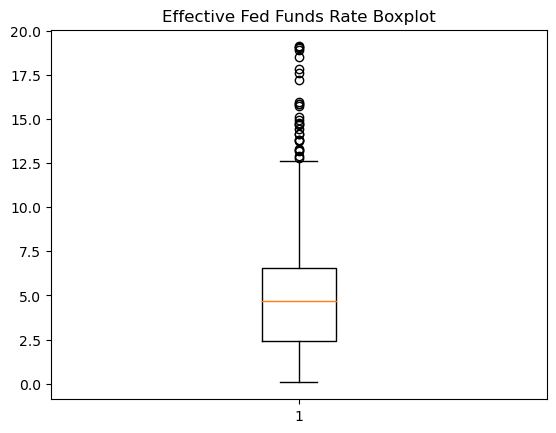

In [15]:
# Rate data boxplot

rates = clean_df['Effective Federal Funds Rate']

rate_quartiles = rates.quantile([0.25,0.5,0.75])
rate_iqr = rate_quartiles[0.75] - rate_quartiles[0.25]
print(rate_iqr)

plt.boxplot(rates)
plt.title('Effective Fed Funds Rate Boxplot')


<Axes: >

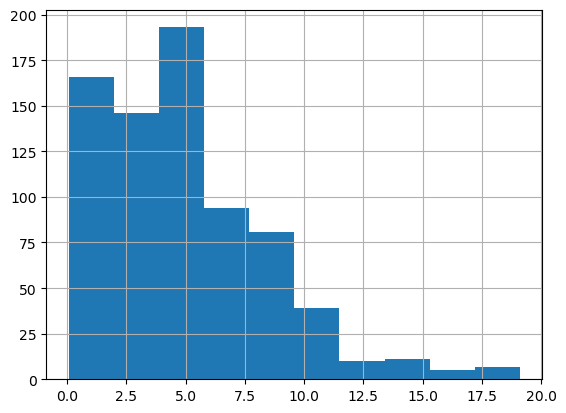

In [16]:
# Rate data histogram

rates.hist()

In [17]:
# Rate data IQR and outlier calculations

clean_df['rate_outlier'] = ''

rate_outliers = []

rate_lb = rate_quartiles[0.25] - (rate_iqr * 1.5)
rate_ub = rate_quartiles[0.75] + (rate_iqr * 1.5)

for x in clean_df['Effective Federal Funds Rate']:
    
    if x < rate_lb or x > rate_ub:
        
        rate_outliers.append(True)
        
    else:
        
        rate_outliers.append(False)
        
clean_df['rate_outlier'] = rate_outliers

clean_df.head(50)

,Date,S&P 500 PE Ratio,Effective Federal Funds Rate,pe_outlier,rate_outlier
0,1954-07-01,11.49,0.80,False,False
1,1954-08-01,11.70,1.22,False,False
2,1954-09-01,11.96,1.06,False,False
3,1954-10-01,12.02,0.85,False,False
4,1954-11-01,12.28,0.83,False,False
5,1954-12-01,12.62,1.28,False,False
6,1955-01-01,12.56,1.39,False,False
7,1955-02-01,12.70,1.29,False,False
8,1955-03-01,12.33,1.35,False,False
9,1955-04-01,12.39,1.43,False,False


In [18]:
# PE outlier datapoint removal + line chart of remaining data

pe_out_free_df = clean_df[clean_df['pe_outlier'] == False]

print(pe_out_free_df.count())

pe_out_free_df.head(50)

Date                            712
S&P 500 PE Ratio                712
Effective Federal Funds Rate    712
pe_outlier                      712
rate_outlier                    712
dtype: int64


,Date,S&P 500 PE Ratio,Effective Federal Funds Rate,pe_outlier,rate_outlier
0,1954-07-01,11.49,0.80,False,False
1,1954-08-01,11.70,1.22,False,False
2,1954-09-01,11.96,1.06,False,False
3,1954-10-01,12.02,0.85,False,False
4,1954-11-01,12.28,0.83,False,False
5,1954-12-01,12.62,1.28,False,False
6,1955-01-01,12.56,1.39,False,False
7,1955-02-01,12.70,1.29,False,False
8,1955-03-01,12.33,1.35,False,False
9,1955-04-01,12.39,1.43,False,False


In [19]:
# Rate outlier datapoint removal + line chart of remaining data (with PE outliers left in, for now)

rate_out_free_df = clean_df[clean_df['rate_outlier'] == False]

print(rate_out_free_df.count())

rate_out_free_df.head(50)

Date                            724
S&P 500 PE Ratio                724
Effective Federal Funds Rate    724
pe_outlier                      724
rate_outlier                    724
dtype: int64


,Date,S&P 500 PE Ratio,Effective Federal Funds Rate,pe_outlier,rate_outlier
0,1954-07-01,11.49,0.80,False,False
1,1954-08-01,11.70,1.22,False,False
2,1954-09-01,11.96,1.06,False,False
3,1954-10-01,12.02,0.85,False,False
4,1954-11-01,12.28,0.83,False,False
5,1954-12-01,12.62,1.28,False,False
6,1955-01-01,12.56,1.39,False,False
7,1955-02-01,12.70,1.29,False,False
8,1955-03-01,12.33,1.35,False,False
9,1955-04-01,12.39,1.43,False,False


Date                            684
S&P 500 PE Ratio                684
Effective Federal Funds Rate    684
pe_outlier                      684
rate_outlier                    684
dtype: int64
          Date  Effective Federal Funds Rate  S&P 500 PE Ratio
0   1954-07-01                          0.80             11.49
1   1954-08-01                          1.22             11.70
2   1954-09-01                          1.06             11.96
3   1954-10-01                          0.85             12.02
4   1954-11-01                          0.83             12.28
5   1954-12-01                          1.28             12.62
6   1955-01-01                          1.39             12.56
7   1955-02-01                          1.29             12.70
8   1955-03-01                          1.35             12.33
9   1955-04-01                          1.43             12.39
10  1955-05-01                          1.43             12.00
11  1955-06-01                          1.64       

<Axes: xlabel='Date'>

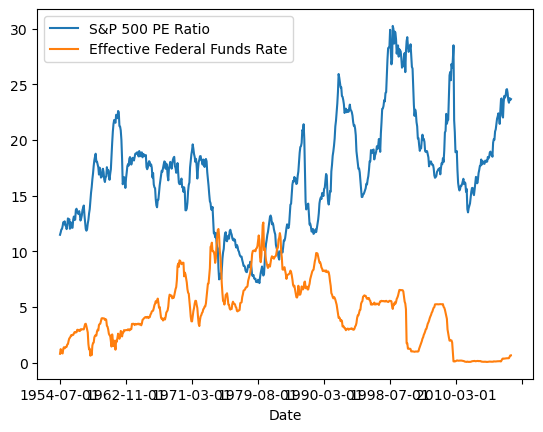

In [20]:
# Merging outlier-free dataframes to reduce to only non-outlier datapoints

outlier_free_df = clean_df[(clean_df['rate_outlier'] == False) & (clean_df['pe_outlier'] == False)]

print(outlier_free_df.count())


# Reducing columns + plotting line chart

outlier_free_df = outlier_free_df[['Date','Effective Federal Funds Rate','S&P 500 PE Ratio']]

print(outlier_free_df.head(50))

outlier_free_df.plot('Date',['S&P 500 PE Ratio','Effective Federal Funds Rate'])


-0.4659337300122876


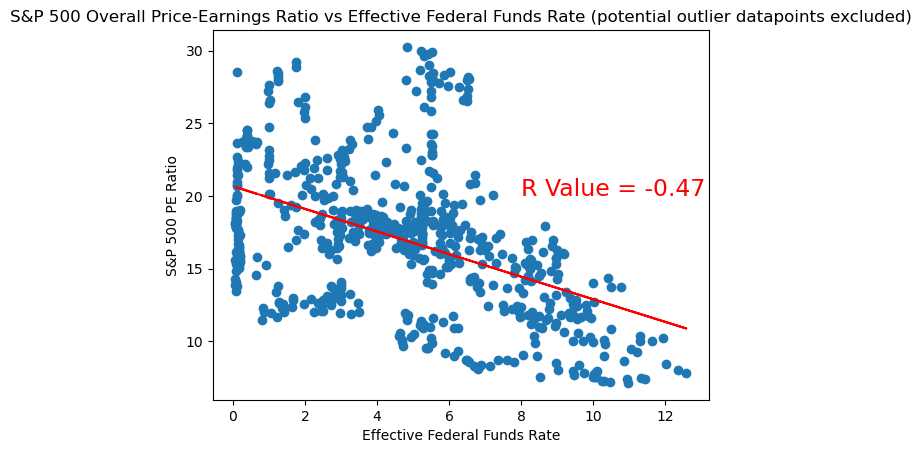

In [21]:
# Regression r value, without outliers

regression = linregress(outlier_free_df['Effective Federal Funds Rate'],outlier_free_df['S&P 500 PE Ratio'])

print(regression.rvalue)


# Scatter plot and linear regression line together, without outliers

plt.scatter(outlier_free_df['Effective Federal Funds Rate'],outlier_free_df['S&P 500 PE Ratio'])
plt.title("S&P 500 Overall Price-Earnings Ratio vs Effective Federal Funds Rate (potential outlier datapoints excluded)")
plt.xlabel("Effective Federal Funds Rate")
plt.ylabel("S&P 500 PE Ratio")
plt.plot(outlier_free_df['Effective Federal Funds Rate'],regression.intercept + regression.slope * outlier_free_df['Effective Federal Funds Rate'],'r')
plt.text(8,20,f'R Value = {round(regression.rvalue,2)}',color='r',fontsize=17)
plt.show()


5.744999999999999
4.0024999999999995
Date                            637
Effective Federal Funds Rate    637
S&P 500 PE Ratio                637
pe_outliers2                    637
rate_outliers2                  637
dtype: int64
-0.5387051676882533


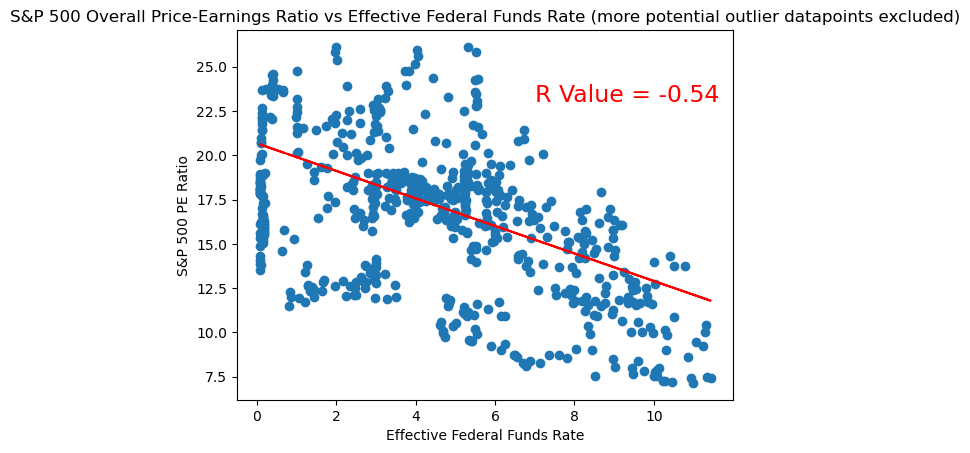

In [22]:
### Another round of outlier removal, to explore how the r-value could increase (in absolute terms) by excluding additional 'extreme' datapoints


# PE iqr calcs (again)

pes2 = outlier_free_df['S&P 500 PE Ratio']

pe_quartiles2 = pes2.quantile([0.25,0.5,0.75])
pe_iqr2 = pe_quartiles2[0.75] - pe_quartiles2[0.25]
print(pe_iqr2)


# Rate iqr calcs (again)

rates2 = outlier_free_df['Effective Federal Funds Rate']

rate_quartiles2 = rates2.quantile([0.25,0.5,0.75])
rate_iqr2 = rate_quartiles2[0.75] - rate_quartiles2[0.25]
print(rate_iqr2)



# Outlier removal (again)

outlier_free_df['pe_outliers2'] = ''
outlier_free_df['rate_outliers2'] = ''


pe_outliers2 = []
rate_outliers2 = []

iqr_factor = 1.25

pe_lb2 = pe_quartiles2[0.25] - (pe_iqr2 * iqr_factor)
pe_ub2 = pe_quartiles2[0.75] + (pe_iqr2 * iqr_factor)

rate_lb2 = rate_quartiles2[0.25] - (rate_iqr2 * iqr_factor)
rate_ub2 = rate_quartiles2[0.75] + (rate_iqr2 * iqr_factor)


for x in outlier_free_df['Effective Federal Funds Rate']:
    
    if x < rate_lb2 or x > rate_ub2:
        
        rate_outliers2.append(True)
        
    else:
        
        rate_outliers2.append(False)
        
outlier_free_df['rate_outliers2'] = rate_outliers2


for y in outlier_free_df['S&P 500 PE Ratio']:
    
    if y < pe_lb2 or y > pe_ub2:
        
        pe_outliers2.append(True)
        
    else:
        
        pe_outliers2.append(False)
        
outlier_free_df['pe_outliers2'] = pe_outliers2


double_outlier_removed_df = outlier_free_df[(outlier_free_df['pe_outliers2'] == False) & (outlier_free_df['rate_outliers2'] == False)]


print(double_outlier_removed_df.count())



# Regression r value, with additional potential outliers removed

regression2 = linregress(double_outlier_removed_df['Effective Federal Funds Rate'],double_outlier_removed_df['S&P 500 PE Ratio'])

print(regression2.rvalue)


# Scatter plot and linear regression line together, with additional potential outliers removed

plt.scatter(double_outlier_removed_df['Effective Federal Funds Rate'],double_outlier_removed_df['S&P 500 PE Ratio'])
plt.title("S&P 500 Overall Price-Earnings Ratio vs Effective Federal Funds Rate (more potential outlier datapoints excluded)")
plt.xlabel("Effective Federal Funds Rate")
plt.ylabel("S&P 500 PE Ratio")
plt.plot(double_outlier_removed_df['Effective Federal Funds Rate'],regression.intercept + regression.slope * double_outlier_removed_df['Effective Federal Funds Rate'],'r')
plt.text(7,23,f'R Value = {round(regression2.rvalue,2)}',color='r',fontsize=17)
plt.show()


Text(0.5, 1.0, 'P/E Ratios Boxplot Showing Additional Potential Outliers Removed')

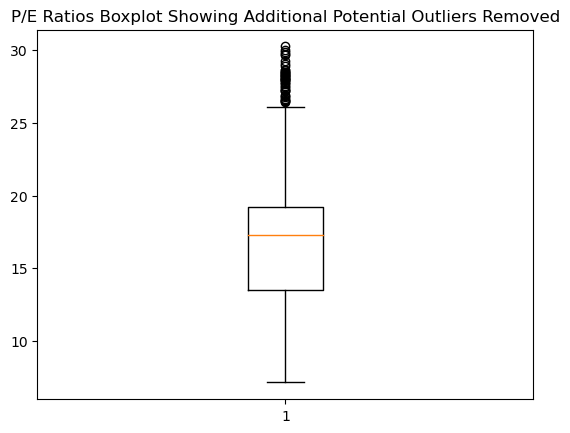

In [23]:

plt.boxplot(pes2, whis=iqr_factor)
plt.title('P/E Ratios Boxplot Showing Additional Potential Outliers Removed')


Text(0.5, 1.0, 'Interest Rates Boxplot Showing Additional Potential Outliers Removed')

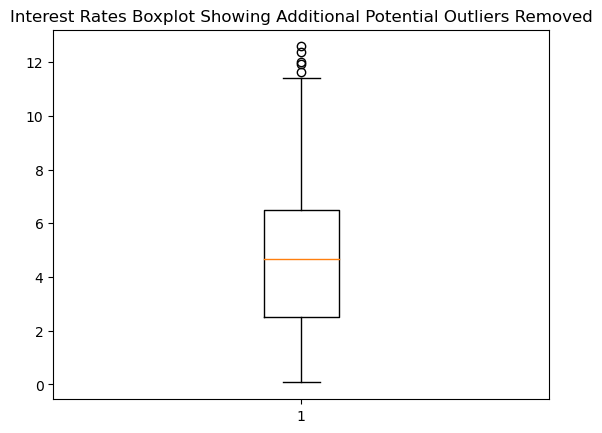

In [24]:
plt.boxplot(rates2, whis=iqr_factor)
plt.title('Interest Rates Boxplot Showing Additional Potential Outliers Removed')
